## LlamaIndex 介绍

_「 LlamaIndex is a framework for building context-augmented LLM applications. Context augmentation refers to any use case that applies LLMs on top of your private or domain-specific data. 」_

LlamaIndex 是一个为开发「上下文增强」的大语言模型应用的框架（也就是SDK）。**上下文增强**，泛指任何在私有或特定领域数据基础上应用大语言模型的情况。例如：


- Question-Answering Chatbots (也就是 RAG)
  
- Document Understanding and Extraction （文档理解与信息抽取） 

- Autonomous Agents that can perform research and take actions （智能体应用）

LlamaIndex 有 Python 和 Typescript 两个版本，Python 版的文档相对更完善。

- Python 文档地址：https://docs.llamaindex.ai/en/stable/
  
- Python API 接口文档：https://docs.llamaindex.ai/en/stable/api_reference/

- TS 文档地址：https://ts.llamaindex.ai/

- TS API 接口文档：https://ts.llamaindex.ai/api/

LlamaIndex 是一个开源框架，Github 链接：https://github.com/run-llama

### LlamaIndex 的核心模块

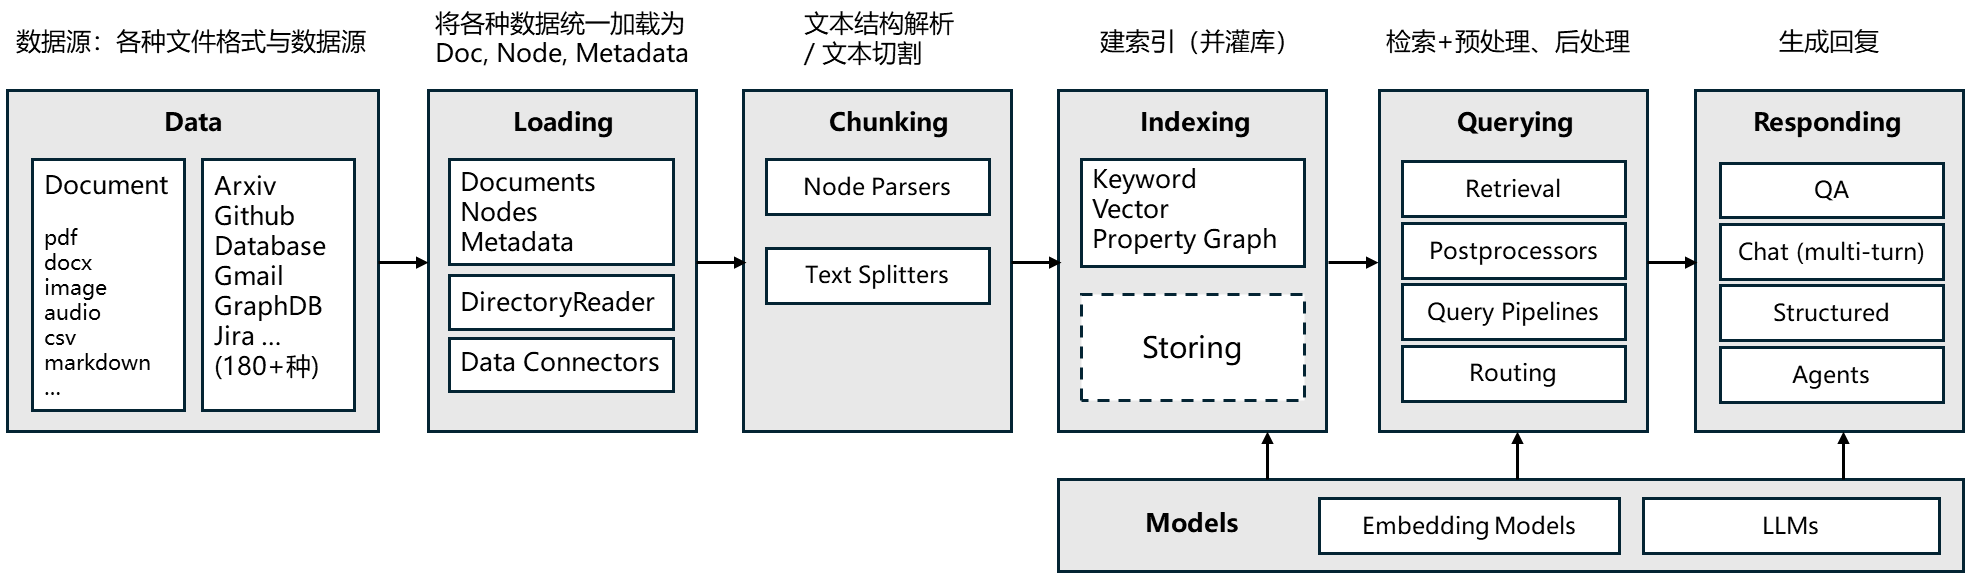

### 安装 LlamaIndex

1. Python

```
pip install llama-index
```

2. Typescript

```
# 通过 npm 安装
npm install llamaindex

# 通过 yarn 安装
yarn add llamaindex

# 通过 pnpm 安装
pnpm add llamaindex
```

本课程以 Python 版为例进行讲解。

## 3、数据加载（Loading）

### 3.1、加载本地数据

`SimpleDirectoryReader` 是一个简单的本地文件加载器。它会遍历指定目录，并根据文件扩展名自动加载文件（**文本内容**）。

支持的文件类型：

- `.csv` - comma-separated values
- `.docx` - Microsoft Word
- `.epub` - EPUB ebook format
- `.hwp` - Hangul Word Processor
- `.ipynb` - Jupyter Notebook
- `.jpeg`, `.jpg` - JPEG image
- `.mbox` - MBOX email archive
- `.md` - Markdown
- `.mp3`, `.mp4` - audio and video
- `.pdf` - Portable Document Format
- `.png` - Portable Network Graphics
- `.ppt`, `.pptm`, `.pptx` - Microsoft PowerPoint

In [4]:
import json
from pydantic.v1 import BaseModel

def show_json(data):
    """用于展示json数据"""
    if isinstance(data, str):
        obj = json.loads(data)
        print(json.dumps(obj, indent=4))
    elif isinstance(data, dict) or isinstance(data, list):
        print(json.dumps(data, indent=4))
    elif issubclass(type(data), BaseModel):
        print(json.dumps(data.dict(), indent=4, ensure_ascii=False))

def show_list_obj(data):
    """用于展示一组对象"""
    if isinstance(data, list):
        for item in data:
            show_json(item)
    else:
        raise ValueError("Input is not a list")

In [5]:
from llama_index.core import SimpleDirectoryReader

reader = SimpleDirectoryReader(
        input_dir="./data", # 目标目录
        recursive=False, # 是否递归遍历子目录
        required_exts=[".pdf"] # (可选)只读取指定后缀的文件
    )
documents = reader.load_data()

In [6]:
show_json(documents[0])

print(documents[0].text)

{
    "id_": "6589e06e-3f95-435d-b1cd-0bfd36205f76",
    "embedding": null,
    "metadata": {
        "page_label": "1",
        "file_name": "llama2-extracted.pdf",
        "file_path": "/home/jovyan/lecture-notes/07-llamaindex/data/llama2-extracted.pdf",
        "file_type": "application/pdf",
        "file_size": 401338,
        "creation_date": "2024-06-14",
        "last_modified_date": "2024-06-14"
    },
    "excluded_embed_metadata_keys": [
        "file_name",
        "file_type",
        "file_size",
        "creation_date",
        "last_modified_date",
        "last_accessed_date"
    ],
    "excluded_llm_metadata_keys": [
        "file_name",
        "file_type",
        "file_size",
        "creation_date",
        "last_modified_date",
        "last_accessed_date"
    ],
    "relationships": {},
    "text": "Llama 2: OpenFoundation andFine-Tuned ChatModels\nHugo Touvron∗Louis Martin†Kevin Stone†\nPeter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov SoumyaBatra\n

<div class="alert alert-warning">
<b>注意：</b>对图像、视频、语音类文件，默认不会自动提取其中文字。如需提取，参考下面介绍的 <code>Data Connectors</code>。
</div>

默认的 `PDFReader` 效果并不理想，我们可以更换文件加载器

In [7]:
# !pip install pymupdf

In [7]:
from llama_index.core import SimpleDirectoryReader
from llama_index.readers.file import PyMuPDFReader

reader = SimpleDirectoryReader(
        input_dir="./data", # 目标目录
        recursive=False, # 是否递归遍历子目录
        required_exts=[".pdf"], # (可选)只读取指定后缀的文件
        file_extractor={".pdf": PyMuPDFReader()} # 指定特定的文件加载器
    )

documents = reader.load_data()

print(documents[0].text)

Llama 2: Open Foundation and Fine-Tuned Chat Models
Hugo Touvron∗
Louis Martin†
Kevin Stone†
Peter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov Soumya Batra
Prajjwal Bhargava Shruti Bhosale Dan Bikel Lukas Blecher Cristian Canton Ferrer Moya Chen
Guillem Cucurull David Esiobu Jude Fernandes Jeremy Fu Wenyin Fu Brian Fuller
Cynthia Gao Vedanuj Goswami Naman Goyal Anthony Hartshorn Saghar Hosseini Rui Hou
Hakan Inan Marcin Kardas Viktor Kerkez Madian Khabsa Isabel Kloumann Artem Korenev
Punit Singh Koura Marie-Anne Lachaux Thibaut Lavril Jenya Lee Diana Liskovich
Yinghai Lu Yuning Mao Xavier Martinet Todor Mihaylov Pushkar Mishra
Igor Molybog Yixin Nie Andrew Poulton Jeremy Reizenstein Rashi Rungta Kalyan Saladi
Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang
Ross Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang
Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Stojnic
Sergey Edunov

更多的 PDF 加载器还有 [`SmartPDFLoader`](https://llamahub.ai/l/readers/llama-index-readers-smart-pdf-loader?from=readers) 和 [`LlamaParse`](https://llamahub.ai/l/readers/llama-index-readers-llama-parse?from=readers), 二者都提供了更丰富的解析能力，包括解析章节与段落结构等。但不是100%准确，偶有文字丢失或错位情况，建议根据自身需求详细测试评估。

### 3.2、Data Connectors

用于处理更丰富的数据类型，并将其读取为 `Document` 的形式（text + metadata）。

例如：加载一个[飞书文档](https://agiclass.feishu.cn/docx/FULadzkWmovlfkxSgLPcE4oWnPf)。（飞书文档 API 访问权限申请，请参考此[说明文档](飞书文档相关权限申请.pdf)）

In [4]:
# !pip install llama-index-readers-feishu-docs

In [8]:
from llama_index.readers.feishu_docs import FeishuDocsReader

# 见说明文档
app_id = "cli_a6f1c0fa1fd9d00b"
app_secret = "dMXCTy8DGaty2xn8I858ZbFDFvcqgiep"

# https://agiclass.feishu.cn/docx/FULadzkWmovlfkxSgLPcE4oWnPf
# 链接最后的 "FULadzkWmovlfkxSgLPcE4oWnPf" 为文档 ID 
doc_ids = ["FULadzkWmovlfkxSgLPcE4oWnPf"]

# 定义飞书文档加载器
loader = FeishuDocsReader(app_id, app_secret)

# 加载文档
documents = loader.load_data(document_ids=doc_ids)

# 显示前1000字符
print(documents[0].text[:1000])

AI 大模型全栈工程师培养计划 - AGIClass.ai

由 AGI 课堂推出的社群型会员制课程，传授大模型的原理、应用开发技术和行业认知，助你成为 ChatGPT 浪潮中的超级个体
什么是 AI 大模型全栈工程师？
「AI 大模型全栈工程师」简称「AI 全栈」，是一个人就能借助 AI，设计、开发和运营基于 AI 的大模型应用的超级个体。
AI 全栈需要懂业务、懂 AI、懂编程，一个人就是一个团队，单枪匹马创造财富。
在技术型公司，AI 全栈最懂 AI，瞬间站上技术顶峰。
在非技术型公司，AI 全栈连接其他员工和 AI，提升整个公司的效率。
在公司外，AI 全栈接项目，独立开发变现小工具，赚取丰厚副业收入。
适合人群
学习本课程，可以在下述目标中三选一：
成为 AI 全栈：懂业务、懂 AI 也懂编程。大量使用 AI，自己完成 AI 应用从策划、开发到落地的全过程。包括商业分析、需求分析、产品设计、开发、测试、市场推广和运营等
成为业务向 AI 全栈：懂业务也懂 AI，与程序员合作，一起完成 AI 应用从策划、开发到落地的全过程
成为编程向 AI 全栈：懂编程也懂 AI，与业务人员合作，一起完成 AI 应用从策划、开发到落地的全过程
懂至少一门编程语言，并有过真实项目开发经验的软件开发⼯程师、⾼级⼯程师、技术总监、研发经理、架构师、测试⼯程师、数据工程师、运维工程师等，建议以「AI 全栈」为目标。即便对商业、产品、市场等的学习达不到最佳，但已掌握的经验和认知也有助于成为有竞争力的「编程向AI 全栈」。
不懂编程的产品经理、需求分析师、创业者、老板、解决方案工程师、项目经理、运营、市场、销售、设计师等，建议优先选择「业务向 AI 全栈」为目标。在课程提供的技术环境里熏陶，提高技术领域的判断力，未来可以和技术人员更流畅地沟通协作。学习过程中，如果能善用 AI 学习编程、辅助编程，就可以向「AI 全栈」迈进。
师资力量
首席讲师 - 王卓然


image.png


哈尔滨工业大学本硕，英国 UCL 博士，国际知名学者、企业家，师从统计机器学习理论奠基人之一 John Shawe-Taylor 教授，是最早从事人机对话研究的华裔学者之一，至今已超 20 年。
他就是 AI 全栈，仍在研发一线，单人销售、售前、开发、实施全流程交付多个数百万金额 AI 项目，全栈实战经验

<div class="alert alert-info">
<b>更多 Data Connectors</b>
    <ul>
        <li>内置的<a href="https://llamahub.ai/l/readers/llama-index-readers-file">文件加载器</a></li>
        <li>连接三方服务的<a href="https://docs.llamaindex.ai/en/stable/module_guides/loading/connector/modules/">数据加载器</a>，例如数据库</li>
        <li>更多加载器可以在 <a href="https://llamahub.ai/">LlamaHub</a> 上找到</li>
    </ul>
</div>

## 4、文本切分与解析（Chunking）

为方便检索，我们通常把 `Document` 切分为 `Node`。

在 LlamaIndex 中，`Node` 被定义为一个文本的「chunk」。

### 4.1、使用 TextSplitters 对文本做切分

例如：`TokenTextSplitter` 按指定 token 数切分文本

In [9]:
from llama_index.core import Document
from llama_index.core.node_parser import TokenTextSplitter

node_parser = TokenTextSplitter(
    chunk_size=100,  # 每个 chunk 的最大长度
    chunk_overlap=50  # chunk 之间重叠长度 
)

nodes = node_parser.get_nodes_from_documents(
    documents, show_progress=False
)

In [10]:
show_json(nodes[0])
show_json(nodes[1])

{
    "id_": "1daba955-5959-4117-8250-7fb73fb0651c",
    "embedding": null,
    "metadata": {
        "document_id": "FULadzkWmovlfkxSgLPcE4oWnPf"
    },
    "excluded_embed_metadata_keys": [],
    "excluded_llm_metadata_keys": [],
    "relationships": {
        "1": {
            "node_id": "f85bd59a-9b2a-4e58-bfc1-3f293d823bfb",
            "node_type": "4",
            "metadata": {
                "document_id": "FULadzkWmovlfkxSgLPcE4oWnPf"
            },
            "hash": "4af8c2ff953f76fa1d608b31dc95b87ee24474294c5e34b83f28902032f054af",
            "class_name": "RelatedNodeInfo"
        },
        "3": {
            "node_id": "e70dcbe3-362b-4bb1-a4ff-a2f83ba1510b",
            "node_type": "1",
            "metadata": {},
            "hash": "654c6cbdd5a23946a84e84e6f3a474de2a442191b2be2d817ba7f04286b1a980",
            "class_name": "RelatedNodeInfo"
        }
    },
    "text": "AI 大模型全栈工程师培养计划 - AGIClass.ai\n\n由 AGI 课堂推出的社群型会员制课程，传授大模型的原理、应用开发技术和行业认知，助你成为",
    "mimetype

LlamaIndex 提供了丰富的 `TextSplitter`，例如：

- [`SentenceSplitter`](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/sentence_splitter/)：在切分指定长度的 chunk 同时尽量保证句子边界不被切断；
- [`CodeSplitter`](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/code/)：根据 AST（编译器的抽象句法树）切分代码，保证代码功能片段完整；
- [`SemanticSplitterNodeParser`](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/semantic_splitter/)：根据语义相关性对将文本切分为片段。

### 4.2、使用 NodeParsers 对有结构的文档做解析

例如：`MarkdownNodeParser`解析 markdown 文档

In [11]:
from llama_index.readers.file import FlatReader
from llama_index.core.node_parser import MarkdownNodeParser
from pathlib import Path

md_docs = FlatReader().load_data(Path("./data/ChatALL.md"))
parser = MarkdownNodeParser()
nodes = parser.get_nodes_from_documents(md_docs)

In [12]:
show_json(nodes[2])
show_json(nodes[3])

{
    "id_": "f7a8caa5-d6fd-4f84-91cf-2614702c2755",
    "embedding": null,
    "metadata": {
        "Header_2": "功能",
        "filename": "ChatALL.md",
        "extension": ".md"
    },
    "excluded_embed_metadata_keys": [],
    "excluded_llm_metadata_keys": [],
    "relationships": {
        "1": {
            "node_id": "0f83f813-2d34-4486-94d0-a966f2325a42",
            "node_type": "4",
            "metadata": {
                "filename": "ChatALL.md",
                "extension": ".md"
            },
            "hash": "45b9149e0039c1ef7fbbd74f96923875505cc77916de48734ba7767f6a16a87e",
            "class_name": "RelatedNodeInfo"
        },
        "2": {
            "node_id": "24bf1a0f-6541-42ae-acf3-e64cd7bc7e3d",
            "node_type": "1",
            "metadata": {
                "Header_2": "屏幕截图",
                "filename": "ChatALL.md",
                "extension": ".md"
            },
            "hash": "117d78eb026d9b5f7d4d884e3cf594bfaa98d43f07dd30ff85b196308f1

更多的 `NodeParser` 包括 [`HTMLNodeParser`](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/html/)，[`JSONNodeParser`](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/json/)等等。

## 5、索引（Indexing）与检索（Retrieval）

**基础概念**：在「检索」相关的上下文中，「索引」即`index`， 通常是指为了实现快速检索而设计的特定「数据结构」。

索引的具体原理与实现不是本课程的教学重点，感兴趣的同学可以参考：[传统索引](https://en.wikipedia.org/wiki/Search_engine_indexing)、[向量索引](https://medium.com/kx-systems/vector-indexing-a-roadmap-for-vector-databases-65866f07daf5)

### 5.1、向量检索

1. `SimpleVectorStore` 直接在内存中构建一个 Vector Store 并建索引

In [13]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core.node_parser import TokenTextSplitter
from llama_index.readers.file import PyMuPDFReader

# 加载 pdf 文档
documents = SimpleDirectoryReader(
    "./data", 
    required_exts=[".pdf"],
    file_extractor={".pdf": PyMuPDFReader()}
).load_data()

# 定义 Node Parser
node_parser = TokenTextSplitter(chunk_size=300, chunk_overlap=100)

# 切分文档
nodes = node_parser.get_nodes_from_documents(documents)

# 构建 index
index = VectorStoreIndex(nodes)

# 获取 retriever
vector_retriever = index.as_retriever(
    similarity_top_k=2 # 返回前两个结果
)

# 检索
results = vector_retriever.retrieve("Llama2有多少参数")

show_list_obj(results)

{
    "node": {
        "id_": "a16ca73d-ec19-4cfb-bc2d-dc82c900b695",
        "embedding": null,
        "metadata": {
            "file_path": "/home/jovyan/lecture-notes/07-llamaindex/data/llama2-extracted.pdf",
            "file_name": "llama2-extracted.pdf",
            "file_type": "application/pdf",
            "file_size": 401338,
            "creation_date": "2024-06-14",
            "last_modified_date": "2024-06-14",
            "total_pages": 4,
            "source": "4"
        },
        "excluded_embed_metadata_keys": [
            "file_name",
            "file_type",
            "file_size",
            "creation_date",
            "last_modified_date",
            "last_accessed_date"
        ],
        "excluded_llm_metadata_keys": [
            "file_name",
            "file_type",
            "file_size",
            "creation_date",
            "last_modified_date",
            "last_accessed_date"
        ],
        "relationships": {
            "1": {
         

<div class="alert alert-warning">
<p>LlamaIndex 默认的 Embedding 模型是 <code>OpenAIEmbedding(model="text-embedding-ada-002")</code>。</p>
<p>如何替换指定的 Embedding 模型见后面章节详解。</p>
</div>

2. 使用自定义的 Vector Store，以 `Chroma` 为例：

In [16]:
# !pip install llama-index-vector-stores-chroma

In [14]:
import os 
if os.environ.get('CUR_ENV_IS_STUDENT','false')=='true':
    __import__('pysqlite3')
    import sys
    sys.modules['sqlite3']= sys.modules.pop('pysqlite3')

In [15]:
import chromadb
from chromadb.config import Settings

# 创建 Chroma Client
# EphemeralClient 在内存创建；如果需要存盘，可以使用 PersistentClient
chroma_client = chromadb.EphemeralClient(settings=Settings(allow_reset=True))

In [16]:
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import VectorStoreIndex
from llama_index.core import StorageContext

chroma_client.reset() # 为演示方便，实际不用每次 reset
chroma_collection = chroma_client.create_collection("demo")

# 创建 Vector Store
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)

# Storage Context 是 Vector Store 的存储容器，用于存储文本、index、向量等数据
storage_context = StorageContext.from_defaults(vector_store=vector_store)

# 创建 index：通过 Storage Context 关联到自定义的 Vector Store
index = VectorStoreIndex(nodes, storage_context=storage_context)

# 获取 retriever
vector_retriever = index.as_retriever(similarity_top_k=2)

# 检索
results = vector_retriever.retrieve("Llama2有多少参数")

show_list_obj(results)

{
    "node": {
        "id_": "a16ca73d-ec19-4cfb-bc2d-dc82c900b695",
        "embedding": null,
        "metadata": {
            "file_path": "/home/jovyan/lecture-notes/07-llamaindex/data/llama2-extracted.pdf",
            "file_name": "llama2-extracted.pdf",
            "file_type": "application/pdf",
            "file_size": 401338,
            "creation_date": "2024-06-14",
            "last_modified_date": "2024-06-14",
            "total_pages": 4,
            "source": "4"
        },
        "excluded_embed_metadata_keys": [
            "file_name",
            "file_type",
            "file_size",
            "creation_date",
            "last_modified_date",
            "last_accessed_date"
        ],
        "excluded_llm_metadata_keys": [
            "file_name",
            "file_type",
            "file_size",
            "creation_date",
            "last_modified_date",
            "last_accessed_date"
        ],
        "relationships": {
            "1": {
         

### 5.2、更多索引与检索方式

LlamaIndex 内置了丰富的检索机制，例如：

- 关键字检索
    - [`BM25Retriever`](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/bm25/)：基于 tokenizer 实现的 BM25 经典检索算法
    - [`KeywordTableGPTRetriever`](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/keyword/#llama_index.core.indices.keyword_table.retrievers.KeywordTableGPTRetriever)：使用 GPT 提取检索关键字
    - [`KeywordTableSimpleRetriever`](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/keyword/#llama_index.core.indices.keyword_table.retrievers.KeywordTableSimpleRetriever)：使用正则表达式提取检索关键字
    - [`KeywordTableRAKERetriever`](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/keyword/#llama_index.core.indices.keyword_table.retrievers.KeywordTableRAKERetriever)：使用[`RAKE`](https://pypi.org/project/rake-nltk/)算法提取检索关键字（有语言限制）
 
- RAG-Fusion [`QueryFusionRetriever`](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/query_fusion/)

- 还支持 [KnowledgeGraph](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/knowledge_graph/)、[SQL](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/sql/#llama_index.core.retrievers.SQLRetriever)、[Text-to-SQL](https://docs.llamaindex.ai/en/stable/api_reference/retrievers/sql/#llama_index.core.retrievers.NLSQLRetriever) 等等


### 5.3、Ingestion Pipeline 自定义数据处理流程
LlamaIndex 通过 `Transformations` 定义一个数据（`Documents`）的多步处理的流程（Pipeline）。
这个 Pipeline 的一个显著特点是，**它的每个子步骤是可以缓存（cache）的**，即如果该子步骤的输入与处理方法不变，重复调用时会直接从缓存中获取结果，而无需重新执行该子步骤，这样即节省时间也会节省 token （如果子步骤涉及大模型调用）。


In [17]:
import time

class Timer:
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time.time()
        self.interval = self.end - self.start
        print(f"耗时 {self.interval*1000} ms")

In [29]:
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.extractors import TitleExtractor
from llama_index.core.ingestion import IngestionPipeline
from llama_index.core import VectorStoreIndex
from llama_index.readers.file import PyMuPDFReader
import nest_asyncio
nest_asyncio.apply() # 只在Jupyter笔记环境中需要此操作，否则会报错

chroma_client.reset() # 为演示方便，实际不用每次 reset
chroma_collection = chroma_client.create_collection("ingestion_demo")

# 创建 Vector Store
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)

pipeline = IngestionPipeline(
    transformations=[
        SentenceSplitter(chunk_size=300, chunk_overlap=100), # 按句子切分
        TitleExtractor(), # 利用 LLM 对文本生成标题
        OpenAIEmbedding(), # 将文本向量化
    ],
    vector_store=vector_store,
)

documents = SimpleDirectoryReader(
    "./data", 
    required_exts=[".pdf"],
    file_extractor={".pdf": PyMuPDFReader()}
).load_data()

# 计时
with Timer():
    # Ingest directly into a vector db
    pipeline.run(documents=documents)

# 创建索引
index = VectorStoreIndex.from_vector_store(vector_store)

# 获取 retriever
vector_retriever = index.as_retriever(similarity_top_k=1)

# 检索
results = vector_retriever.retrieve("Llama2有多少参数")

show_list_obj(results[:1])

100%|██████████| 4/4 [00:00<00:00,  6.78it/s]


耗时 7271.249771118164 ms
{
    "node": {
        "id_": "3847f96e-ce00-4c0e-a091-cde4ffa2a04d",
        "embedding": null,
        "metadata": {
            "file_path": "/home/jovyan/lecture-notes/07-llamaindex/data/llama2-extracted.pdf",
            "file_name": "llama2-extracted.pdf",
            "file_type": "application/pdf",
            "file_size": 401338,
            "creation_date": "2024-06-14",
            "last_modified_date": "2024-06-14",
            "total_pages": 4,
            "source": "4",
            "document_title": "Responsible Deployment and Safety Evaluation of Llama 2-Chat Models: Enhancing Language Models for Societal Benefits"
        },
        "excluded_embed_metadata_keys": [
            "file_name",
            "file_type",
            "file_size",
            "creation_date",
            "last_modified_date",
            "last_accessed_date"
        ],
        "excluded_llm_metadata_keys": [
            "file_name",
            "file_type",
            "

本地保存 `IngestionPipeline` 的缓存

In [19]:
pipeline.persist("./pipeline_storage")

In [27]:
new_pipeline = IngestionPipeline(
    transformations=[
        SentenceSplitter(chunk_size=300, chunk_overlap=100),
        TitleExtractor(),
        OpenAIEmbedding()
    ],
)

# 加载缓存
new_pipeline.load("./pipeline_storage")

with Timer():
    nodes = new_pipeline.run(documents=documents)

100%|██████████| 4/4 [00:00<00:00,  6.67it/s]


耗时 7131.136894226074 ms


此外，也可以用远程的 Redis 或 MongoDB 等存储 `IngestionPipeline` 的缓存，具体参考官方文档：[Remote Cache Management](https://docs.llamaindex.ai/en/stable/module_guides/loading/ingestion_pipeline/#remote-cache-management)。

`IngestionPipeline` 也支持异步和并发调用，请参考官方文档：[Async Support](https://docs.llamaindex.ai/en/stable/module_guides/loading/ingestion_pipeline/#async-support)、[Parallel Processing](https://docs.llamaindex.ai/en/stable/module_guides/loading/ingestion_pipeline/#parallel-processing)。

### 5.4、检索后处理

LlamaIndex 的 `Node Postprocessors` 提供了一系列检索后处理模块。

例如：我们可以用不同模型对检索后的 `Nodes` 做重排序

In [23]:
# 获取 retriever
vector_retriever = index.as_retriever(similarity_top_k=5)

# 检索
nodes = vector_retriever.retrieve("Llama2 能商用吗?")

for i, node in enumerate(nodes):
    print(f"[{i}] {node.text}")

[0] Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang
Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Stojnic
Sergey Edunov
Thomas Scialom∗
GenAI, Meta
Abstract
In this work, we develop and release Llama 2, a collection of pretrained and fine-tuned
large language models (LLMs) ranging in scale from 7 billion to 70 billion parameters.
Our fine-tuned LLMs, called Llama 2-Chat, are optimized for dialogue use cases. Our
models outperform open-source chat models on most benchmarks we tested, and based on
our human evaluations for helpfulness and safety, may be a suitable substitute for closed-
source models. We provide a detailed description of our approach to fine-tuning and safety
improvements of Llama 2-Chat in order to enable the community to build on our work and
contribute to the responsible development of LLMs.
∗Equal contribution, corresponding authors: {tscialom, htouvron}@meta.com
†Second author
Contributions for all the authors can be found in Section A.1.
[1]

<div class="alert alert-danger">
以下代码不要在服务器上运行，会死机！<br />
可下载左侧 rag_demo.py 的完整例子在自己本地运行。
</div>

In [24]:
from llama_index.core.postprocessor import SentenceTransformerRerank

# 检索后排序模型
postprocessor = SentenceTransformerRerank(
    model="BAAI/bge-reranker-large", top_n=2
)

nodes = postprocessor.postprocess_nodes(nodes, query_str="Llama2 能商用吗?")

for i, node in enumerate(nodes):
    print(f"[{i}] {node.text}")

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jovyan/.local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[0] Figure 3: Safety human evaluation results for Llama 2-Chat compared to other open-source and closed-
source models. Human raters judged model generations for safety violations across ~2,000 adversarial
prompts consisting of both single and multi-turn prompts. More details can be found in Section 4.4. It is
important to caveat these safety results with the inherent bias of LLM evaluations due to limitations of the
prompt set, subjectivity of the review guidelines, and subjectivity of individual raters. Additionally, these
safety evaluations are performed using content standards that are likely to be biased towards the Llama
2-Chat models.
We are releasing the following models to the general public for research and commercial use‡:
1. Llama 2, an updated version of Llama 1, trained on a new mix of publicly available data. We also
increased the size of the pretraining corpus by 40%, doubled the context length of the model, and
adopted grouped-query attention (Ainslie et al., 2023). We

更多的 Rerank 及其它后处理方法，参考官方文档：[Node Postprocessor Modules](https://docs.llamaindex.ai/en/stable/module_guides/querying/node_postprocessors/node_postprocessors/)

## 6、生成回复（QA & Chat）

### 6.1、单轮问答（Query Engine）

In [30]:
qa_engine = index.as_query_engine()
response = qa_engine.query("Llama2 有多少参数?")

print(response)

Llama 2 有7B, 13B, 和 70B 参数。


#### 流式输出

In [31]:
qa_engine = index.as_query_engine(streaming=True)
response = qa_engine.query("Llama2 有多少参数?")
response.print_response_stream()

Llama 2有7B, 13B, 和70B参数。

### 6.2、多轮对话（Chat Engine）

In [32]:
chat_engine = index.as_chat_engine()
response = chat_engine.chat("Llama2 有多少参数?")
print(response)

Llama2 有7B, 13B, 和70B参数。


In [33]:
response = chat_engine.chat("How many at most?")
print(response)

Llama2 最多有70B参数。


#### 流式输出

In [34]:
chat_engine = index.as_chat_engine()
streaming_response = chat_engine.stream_chat("Llama 2有多少参数?")
for token in streaming_response.response_gen:
    print(token, end="")

Llama 2有7B, 13B, 和70B参数。

## 7、底层接口：Prompt、LLM 与 Embedding

### 7.1、Prompt 模板

#### `PromptTemplate` 定义提示词模板

In [35]:
from llama_index.core import PromptTemplate

prompt = PromptTemplate("写一个关于{topic}的笑话")

prompt.format(topic="小明")

'写一个关于小明的笑话'

#### `ChatPromptTemplate` 定义多轮消息模板

In [36]:
from llama_index.core.llms import ChatMessage, MessageRole
from llama_index.core import ChatPromptTemplate

chat_text_qa_msgs = [
    ChatMessage(
        role=MessageRole.SYSTEM,
        content="你叫{name}，你必须根据用户提供的上下文回答问题。",
    ),
    ChatMessage(
        role=MessageRole.USER, 
        content=(
            "已知上下文：\n" \
            "{context}\n\n" \
            "问题：{question}"
        )
    ),
]
text_qa_template = ChatPromptTemplate(chat_text_qa_msgs)

print(
    text_qa_template.format(
        name="瓜瓜",
        context="这是一个测试",
        question="这是什么"
    )
)

system: 你叫瓜瓜，你必须根据用户提供的上下文回答问题。
user: 已知上下文：
这是一个测试

问题：这是什么
assistant: 


### 7.2、语言模型

In [37]:
from llama_index.llms.openai import OpenAI

llm = OpenAI(temperature=0, model="gpt-4o")

In [38]:
response = llm.complete(prompt.format(topic="小明"))

print(response.text)

有一天，小明在课堂上听老师讲解数学题。老师问道：“如果你有10个苹果，给了小红3个，给了小刚2个，你还剩下多少个苹果？”

小明想了想，回答道：“老师，我还剩下5个苹果。”

老师点点头，继续问：“那如果你再给小华2个苹果呢？”

小明皱了皱眉头，认真地说：“那我就得重新买苹果了，因为我根本不认识小华！”


In [39]:
response = llm.complete(
    text_qa_template.format(
        name="瓜瓜",
        context="这是一个测试",
        question="你是谁，我们在干嘛"
    )
)

print(response.text)

我是瓜瓜。根据你提供的上下文，这是一个测试。我们正在进行一个测试。


#### 设置全局使用的语言模型

In [40]:
from llama_index.core import Settings

Settings.llm = OpenAI(temperature=0, model="gpt-4o")

除 OpenAI 外，LlamaIndex 已集成多个大语言模型，包括云服务 API 和本地部署 API，详见官方文档：[Available LLM integrations](https://docs.llamaindex.ai/en/stable/module_guides/models/llms/modules/)

### 7.3、Embedding 模型

In [41]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import Settings

# 全局设定
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-small", dimensions=512)

LlamaIndex 同样集成了多种 Embedding 模型，包括云服务 API 和开源模型（HuggingFace）等，详见[官方文档](https://docs.llamaindex.ai/en/stable/module_guides/models/embeddings/)。

## 8、基于 LlamaIndex 实现一个功能较完整的 RAG 系统

功能要求：

- 加载指定目录的文件
- 支持 RAG-Fusion
- 使用 ChromaDB 向量数据库，并持久化到本地
- 支持检索后排序
- 支持多轮对话

In [42]:
import chromadb
 
# 创建 ChromaDB 向量数据库，并持久化到本地
chroma_client = chromadb.PersistentClient(path="./chroma_db")

In [43]:
from llama_index.core import VectorStoreIndex, KeywordTableIndex, SimpleDirectoryReader
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.ingestion import IngestionPipeline
from llama_index.readers.file import PyMuPDFReader
from llama_index.core import Settings
from llama_index.core import StorageContext
from llama_index.core.postprocessor import SentenceTransformerRerank
from llama_index.core.retrievers import QueryFusionRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.chat_engine import CondenseQuestionChatEngine
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding
import time
import nest_asyncio
nest_asyncio.apply() # 只在Jupyter笔记环境中需要此操作，否则会报错

# 1. 指定全局llm与embedding模型
Settings.llm = OpenAI(temperature=0, model="gpt-4o")
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-small", dimensions=512)
# 2. 指定全局文档处理的 Ingestion Pipeline
Settings.transformations = [SentenceSplitter(chunk_size=300, chunk_overlap=100)]

# 3. 加载本地文档
documents = SimpleDirectoryReader("./data", file_extractor={".pdf": PyMuPDFReader()}).load_data()

# 4. 新建 collection
collection_name = hex(int(time.time()))
chroma_collection = chroma_client.get_or_create_collection(collection_name)

# 5. 创建 Vector Store
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
# 6. 指定 Vector Store 的 Storage 用于 index
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context
)

# 7. 定义检索后排序模型
reranker = SentenceTransformerRerank(
    model="BAAI/bge-reranker-large", top_n=2
)

# 8. 定义 RAG Fusion 检索器
fusion_retriever = QueryFusionRetriever(
    [index.as_retriever()],
    similarity_top_k=5, # 检索召回 top k 结果
    num_queries=3,  # 生成 query 数
    use_async=True,
    # query_gen_prompt="...",  # 可以自定义 query 生成的 prompt 模板
)

# 9. 构建单轮 query engine
query_engine = RetrieverQueryEngine.from_args(
    fusion_retriever,
    node_postprocessors=[reranker]
)

# 10. 对话引擎
chat_engine = CondenseQuestionChatEngine.from_defaults(
    query_engine=query_engine, 
    # condense_question_prompt=... # 可以自定义 chat message prompt 模板
)

In [44]:
while True:
    question=input("User:")
    if question.strip() == "":
        break
    response = chat_engine.chat(question)
    print(f"AI: {response}")

User: Llama2有多少参数


AI: Llama 2有7B、13B和70B参数的变体。


User: 最少多少


AI: Llama 2的变体中，参数最少的是7B。


User: ChatALL在哪下载


AI: 您可以从 https://github.com/sunner/ChatALL/releases 下载 ChatALL。


User: 


## LlamaIndex 的更多功能

- 智能体（Agent）开发框架：https://docs.llamaindex.ai/en/stable/module_guides/deploying/agents/
- RAG 的评测：https://docs.llamaindex.ai/en/stable/module_guides/evaluating/
- 过程监控：https://docs.llamaindex.ai/en/stable/module_guides/observability/

以上内容涉及较多背景知识，暂时不在本课展开，相关知识会在后面课程中逐一详细讲解。

此外，LlamaIndex 针对生产级的 RAG 系统中遇到的各个方面的细节问题，总结了很多高端技巧（[Advanced Topics](https://docs.llamaindex.ai/en/stable/optimizing/production_rag/)），对实战很有参考价值，非常推荐有能力的同学阅读。